In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import Lasso
import warnings
import seaborn as sns
import matplotlib.colors as mcolors
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [165]:
spot_prices = pd.read_csv("spotpriser.csv").set_index("time")
consumption = pd.read_csv("consumption_temp_with_flags.csv").set_index("time")

oslo_consumption = consumption[consumption["location"] == "oslo"]
oslo_consumption = oslo_consumption.merge(spot_prices["oslo"], left_index=True, right_index=True, how="left")
oslo_consumption=oslo_consumption.drop(['location'],axis=1).rename(columns={'oslo':'spot_price'})

stavanger_consumption = consumption[consumption["location"] == "stavanger"]
stavanger_consumption = stavanger_consumption.merge(spot_prices["stavanger"], left_index=True, right_index=True, how="left")
stavanger_consumption=stavanger_consumption.drop(['location'],axis=1).rename(columns={'stavanger':'spot_price'})

trondheim_consumption = consumption[consumption["location"] == "trondheim"]
trondheim_consumption = trondheim_consumption.merge(spot_prices["trondheim"], left_index=True, right_index=True, how="left")
trondheim_consumption=trondheim_consumption.drop(['location'],axis=1).rename(columns={'trondheim':'spot_price'})

tromso_consumption = consumption[consumption["location"] == "tromsø"]
tromso_consumption = tromso_consumption.merge(spot_prices["tromsø"], left_index=True, right_index=True, how="left")
tromso_consumption=tromso_consumption.drop(['location'],axis=1).rename(columns={'tromsø':'spot_price'})

bergen_consumption = consumption[consumption["location"] == "bergen"]
bergen_consumption = bergen_consumption.merge(spot_prices["bergen"], left_index=True, right_index=True, how="left")
bergen_consumption=bergen_consumption.drop(['location'],axis=1).rename(columns={'bergen':'spot_price'})

helsingfors_consumption = consumption[consumption["location"] == "helsingfors"]
helsingfors_consumption = helsingfors_consumption.merge(spot_prices["bergen"], left_index=True, right_index=True, how="left")
helsingfors_consumption=helsingfors_consumption.drop(['location'],axis=1)



    

/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/29871690.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/29871690.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/29871690.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

<Figure size 1000x600 with 0 Axes>

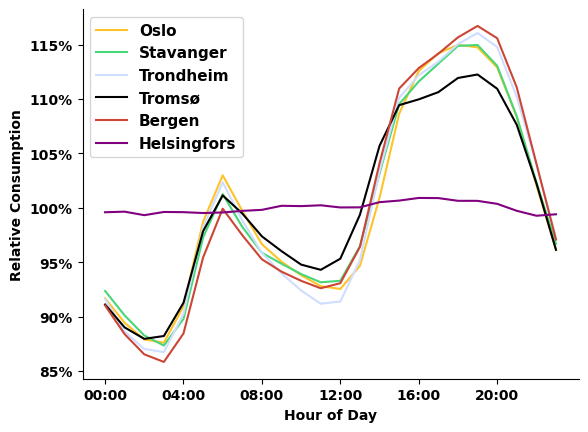

In [166]:
DF_STRINGS = ["Oslo","Stavanger","Trondheim","Tromsø","Bergen", 'Helsingfors']
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][(DFS[i]['is_weekend'] == 0) & (DFS[i]['is_holiday'] == 0)]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    plot_df['formatted_time'] = plot_df.index
    plot_df['formatted_time']=plot_df['formatted_time'].astype(str)+":00"
    for j in range(12):
        plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
    ax.plot(plot_df['formatted_time'],plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    ax.set_xticks(plot_df['formatted_time'][::4])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Relative Consumption', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/2772202665.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/2772202665.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/2772202665.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

<Figure size 1000x600 with 0 Axes>

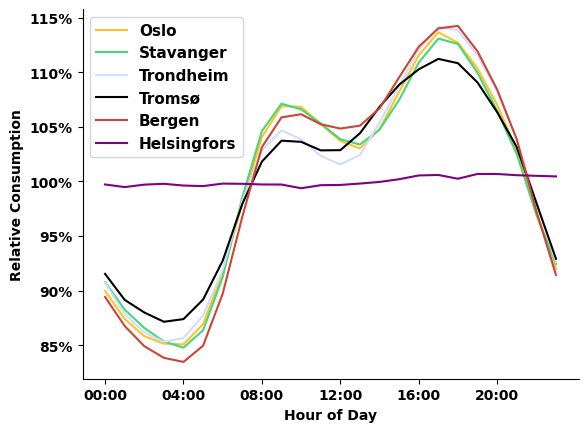

In [167]:
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][(DFS[i]['is_weekend'] == 1) & (DFS[i]['is_holiday'] == 0)]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    plot_df['formatted_time'] = plot_df.index
    plot_df['formatted_time']=plot_df['formatted_time'].astype(str)+":00"
    for j in range(12):
        plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
    ax.plot(plot_df['formatted_time'],plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    ax.set_xticks(plot_df['formatted_time'][::4])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Relative Consumption', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/589616718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/589616718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
/var/folders/js/9hpr3tt17xd6ttv9xy3zrhw80000gn/T/ipykernel_9227/589616718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

<Figure size 1000x600 with 0 Axes>

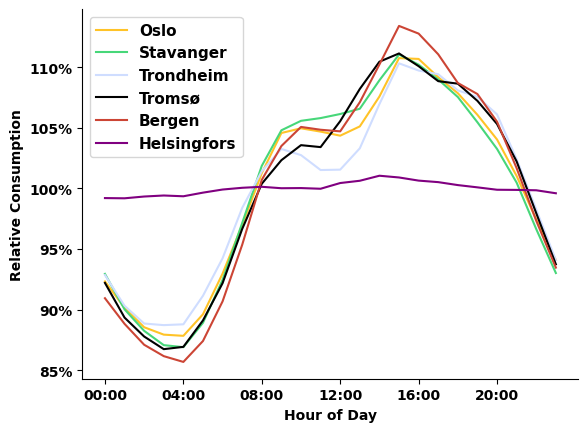

In [168]:
DFS = [oslo_consumption,stavanger_consumption,trondheim_consumption,tromso_consumption,bergen_consumption, helsingfors_consumption]
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
for i in range(len(DFS)):
    data = DFS[i][DFS[i]['is_holiday'] == 1]
    data.index = pd.to_datetime(data.index)
    plot_df = data.groupby(data.index.hour).mean()
    plot_df['formatted_time'] = plot_df.index
    plot_df['formatted_time']=plot_df['formatted_time'].astype(str)+":00"
    for j in range(12):
        plot_df['formatted_time'][j] = "0"+plot_df['formatted_time'][j]
    ax.plot(plot_df['formatted_time'],plot_df.consumption/plot_df.consumption.mean(), label=DF_STRINGS[i], color=Colors[i], linewidth=1.5)
    ax.set_xticks(plot_df['formatted_time'][::4])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
    plt.xlabel('Hour of Day', fontweight='bold')
    plt.ylabel(f'Relative Consumption', fontweight='bold')
    legend = plt.legend(fontsize='11')
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    i += 1
plt.show()

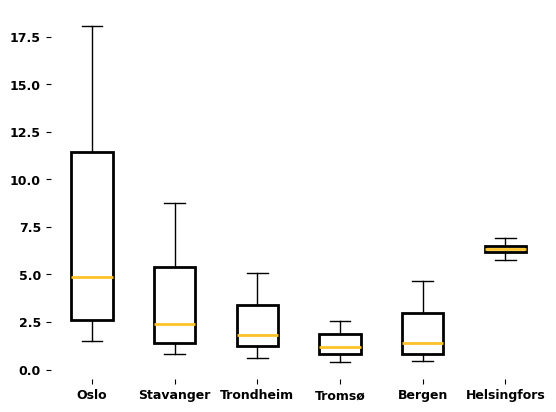

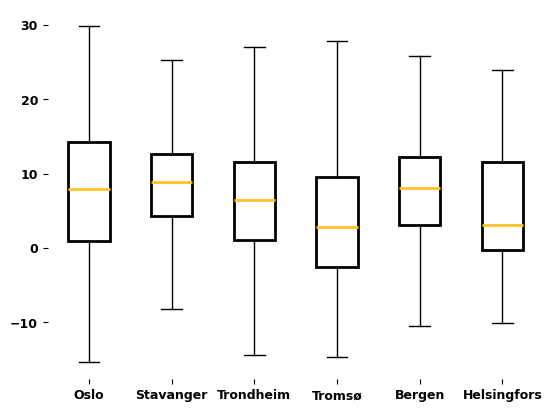

In [213]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_column_across_dfs(dfs, column_name,strings, unit):

    data_to_plot = [df[column_name].dropna() for df in dfs if column_name in df.columns]
    fig,ax  = plt.subplots()
    boxprops = dict(linestyle='-', linewidth=2, color='black',facecolor = 'white')
    medianprops = dict(linestyle='-', linewidth=2, color='#FFC328')   
    ax.boxplot(data_to_plot,patch_artist=True, showfliers=False, boxprops=boxprops, medianprops=medianprops)
    plt.xticks(range(1, len(data_to_plot) + 1), strings, fontsize = 9)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold', fontsize = 9)
    for text in legend.get_texts():
        text.set_fontweight('bold')
    plt.show()

compare_column_across_dfs(DFS, "consumption",DF_STRINGS, "MW")
compare_column_across_dfs(DFS, "temperature",DF_STRINGS, "Degrees Celsius")


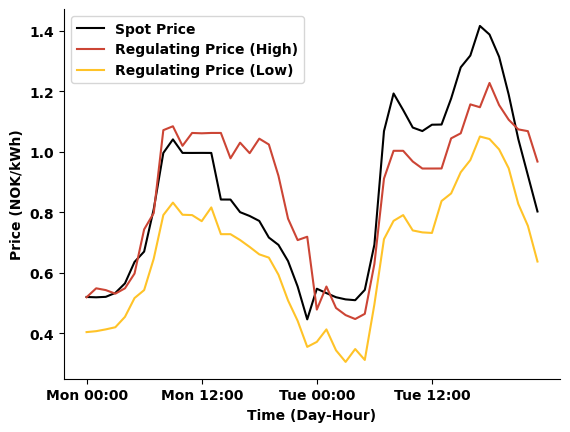

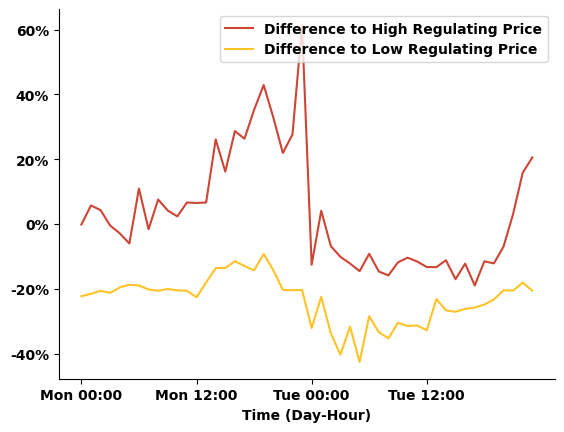

In [185]:
price_comparison = pd.read_csv("spot_regulating_price_trd.csv").dropna()

# Convert the 'time' column to datetime
price_comparison['time'] = pd.to_datetime(price_comparison['time'])

# Format the DateTime to show only day and hour and add as a new column
price_comparison['formatted_time'] = price_comparison['time'].dt.strftime('%a %H:%M')

# Plotting
plt.plot(price_comparison['formatted_time'], price_comparison["spot"], label='Spot Price', color = 'black')
plt.plot(price_comparison['formatted_time'], price_comparison["reg_H"], label='Regulating Price (High)',color = '#CC4535')
plt.plot(price_comparison['formatted_time'], price_comparison["reg_L"], label='Regulating Price (Low)', color = '#FFC328')
x_ticks = price_comparison['formatted_time'].iloc[::12]
plt.xticks(x_ticks, fontweight='bold')
plt.yticks(fontweight='bold')
# Improve plot
plt.xlabel('Time (Day-Hour)',fontweight='bold')
plt.ylabel('Price (NOK/kWh)',fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
for text in plt.legend().get_texts():
        text.set_fontweight('bold')
plt.show()

price_comparison["up"] = (price_comparison["reg_H"]-price_comparison["spot"])/price_comparison["spot"]
price_comparison["down"] = (price_comparison["reg_L"]-price_comparison["spot"])/price_comparison["spot"]
plt.plot(price_comparison['formatted_time'], price_comparison["up"], label='Difference to High Regulating Price', color = '#CC4535')
plt.plot(price_comparison['formatted_time'], price_comparison["down"], label='Difference to Low Regulating Price', color = '#FFC328')
x_ticks = price_comparison['formatted_time'].iloc[::12]
plt.xticks(x_ticks, fontweight='bold')
plt.yticks(fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
# Improve plot
plt.xlabel('Time (Day-Hour)',fontweight='bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
for text in plt.legend().get_texts():
        text.set_fontweight('bold')
plt.show()

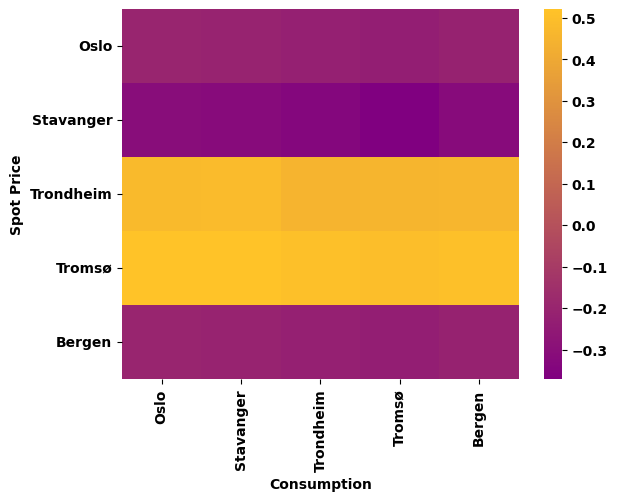

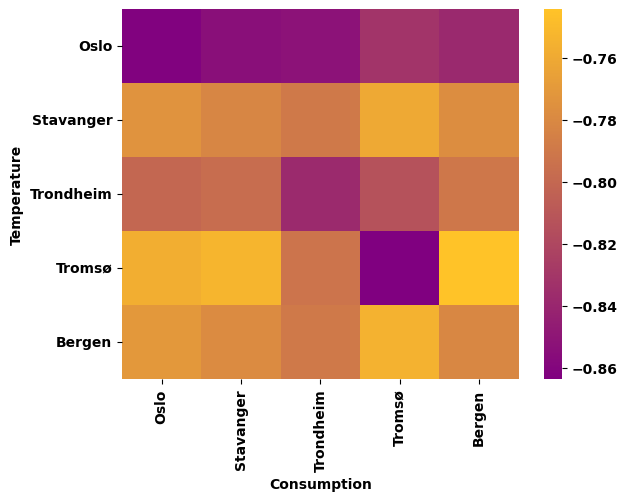

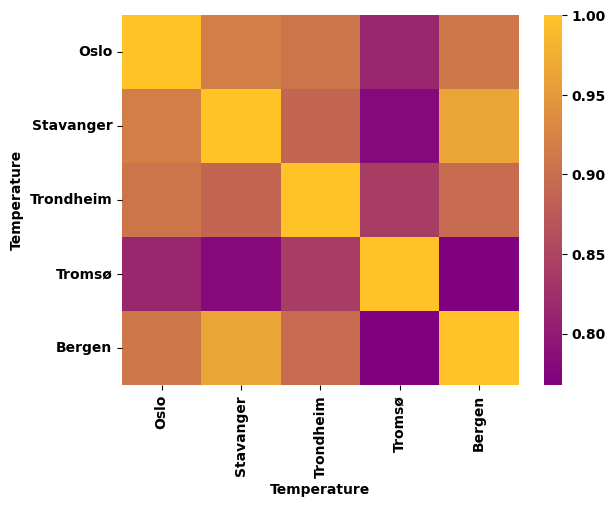

In [223]:
def plot_correlation_heatmap(dfs, column_1, column_2):
    corrs = np.zeros((len(dfs),len(dfs)))
    for i in range(len(dfs)):
        for j in range(len(dfs)):
            corrs[i][j] = np.corrcoef(dfs[i][column_1].values, dfs[j][column_2].values)[0][1]
    # Plotting the heatmap
    cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", ['purple','#FFC328'])
    heatmap  = sns.heatmap(corrs, annot=False, cmap=cmap, fmt=".2f",xticklabels=DF_STRINGS[:-1], yticklabels=DF_STRINGS[:-1])

    cbar = heatmap.collections[0].colorbar
    for label in cbar.ax.get_yticklabels():
        label.set_fontweight('bold')
    plt.xticks(fontweight = 'bold',rotation=90)
    plt.yticks(fontweight = 'bold',rotation=0)
    plt.xlabel(f"{column_2.title()}", fontweight = 'bold',rotation=0)
    plt.ylabel(f"{column_1.title()}", fontweight = 'bold',rotation=90)
    plt.show()

for i in range(len(DFS)):
    DFS[i].dropna(inplace=True)
    DFS[i].rename(columns={"spot_price":"spot price"}, inplace=True)
plot_correlation_heatmap(DFS[:-1], "spot price", "consumption")
plot_correlation_heatmap(DFS[:-1], "temperature", "consumption")
plot_correlation_heatmap(DFS[:-1], "temperature", "temperature")



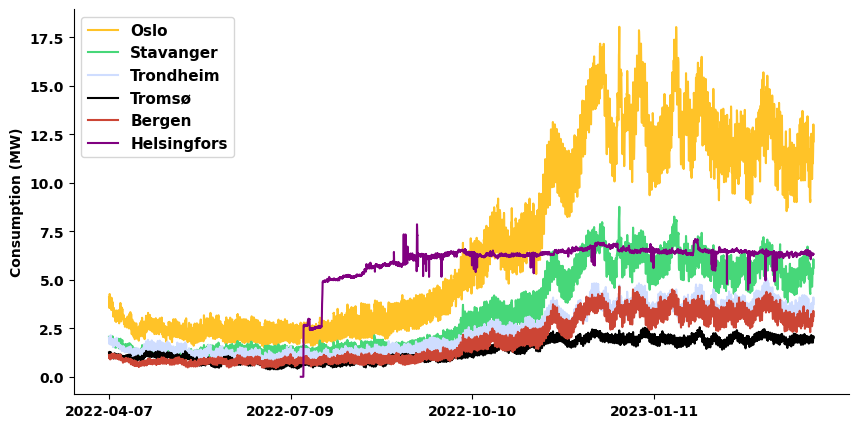

In [214]:
fig,ax = plt.subplots(figsize=(10, 5))
for i in range(len(DFS)):
    data = DFS[i]
    data.index = pd.to_datetime(data.index)
    ax.plot(DFS[i]["consumption"], color = Colors[i], label = DF_STRINGS[i])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.ylabel(f'Consumption (MW)', fontweight='bold')
legend = plt.legend(fontsize='11')
for text in legend.get_texts():
    text.set_fontweight('bold')
x_ticks = DFS[0].index[::2228]
plt.xticks(x_ticks, fontweight='bold')
plt.yticks(fontweight='bold')
legend = plt.legend(fontsize='11')
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.show()

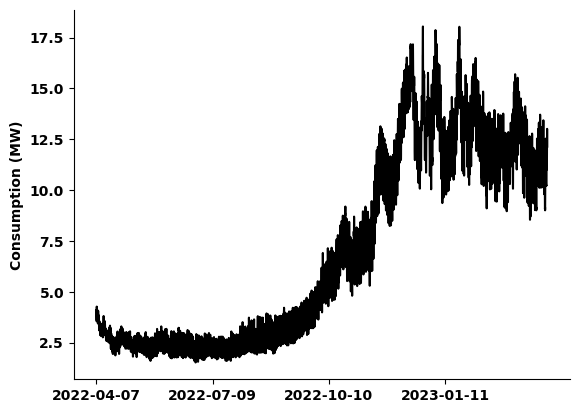

In [208]:
fig,ax = plt.subplots()
for i in range(1):
    data = DFS[i]
    data.index = pd.to_datetime(data.index)
    ax.plot(DFS[i]["consumption"], color = 'black', label = DF_STRINGS[i])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.ylabel(f'Consumption (MW)', fontweight='bold')
for text in legend.get_texts():
    text.set_fontweight('bold')
x_ticks = DFS[0].index[::2228]
plt.xticks(x_ticks, fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

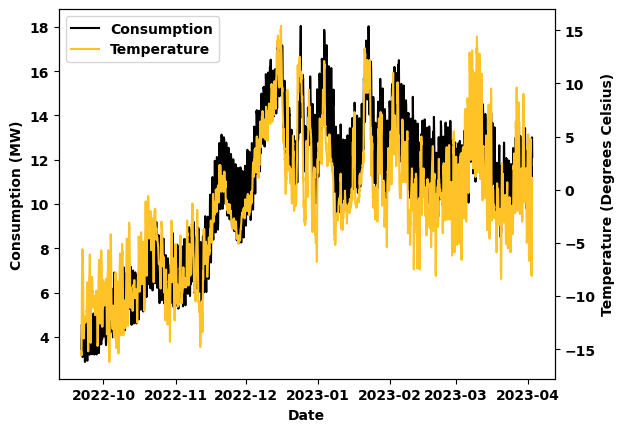

In [173]:
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
i = 0
data = DFS[i].iloc[4000:]
fig, ax = plt.subplots()
ax.plot(data["consumption"], color="black", label="Consumption")
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Consumption (MW)', color='black', fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

ax2 = ax.twinx()
ax2.plot(-data["temperature"], color="#FFC328", label="Temperature")
ax2.set_ylabel('Temperature (Degrees Celsius)', color='black', fontweight='bold')
ax2.tick_params(axis='y', which='major', labelsize=10, labelcolor='black')

for direction in ['top', 'right', 'left','bottom']:
    ax.spines[direction].set_visible(True)
    ax2.spines[direction].set_visible(True)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

handles, labels = [], []
for ax in [ax, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Create a single legend
legend = ax.legend(handles, labels, loc="upper left")
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.show()




In [174]:
for df in DFS:
    print(df.describe())

       consumption  temperature   spot_price
count  8642.000000  8642.000000  8641.000000
mean      6.876274     7.392745     2.321859
std       4.672386     8.770403     1.422278
min       1.520560   -15.400000     0.000510
25%       2.610585     0.900000     1.431400
50%       4.872521     7.900000     2.020100
75%      11.457493    14.200000     2.663640
max      18.045011    29.799999     9.775410
       consumption  temperature   spot_price
count  8642.000000  8642.000000  8641.000000
mean      3.304638     8.547628     2.561101
std       2.112849     5.839626     1.628197
min       0.832372    -9.200000     0.000510
25%       1.382767     4.300000     1.432910
50%       2.391207     8.900000     2.134150
75%       5.398753    12.700000     3.256860
max       8.763147    27.000000    10.280790
       consumption  temperature   spot_price
count  8642.000000  8642.000000  8641.000000
mean      2.278534     6.213180     0.661745
std       1.137251     7.616419     0.880584
min       

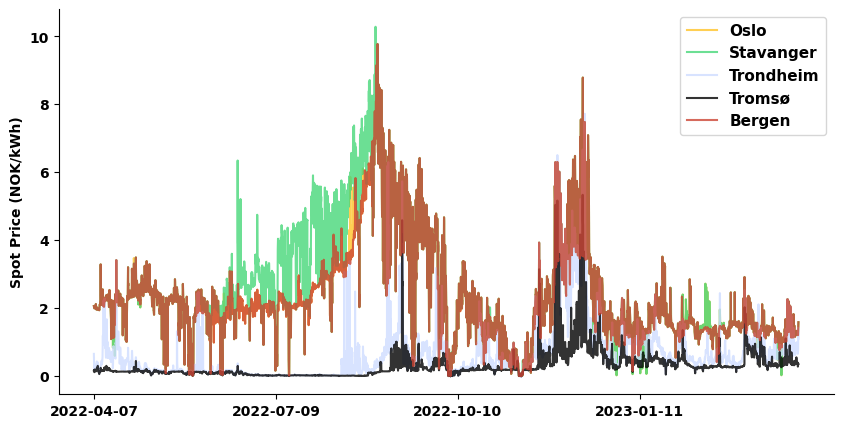

In [215]:
fig,ax = plt.subplots(figsize=(10, 5))
for i in range(len(DFS)-1):
    data = DFS[i]
    data.index = pd.to_datetime(data.index)
    ax.plot(DFS[i]["spot_price"], color = Colors[i], label = DF_STRINGS[i],alpha = 0.8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.ylabel(f'Spot Price (NOK/kWh)', fontweight='bold')
x_ticks = DFS[0].index[::2232]
plt.xticks(x_ticks, fontweight='bold')
plt.yticks(fontweight='bold')
legend = plt.legend(fontsize='11')
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.show()


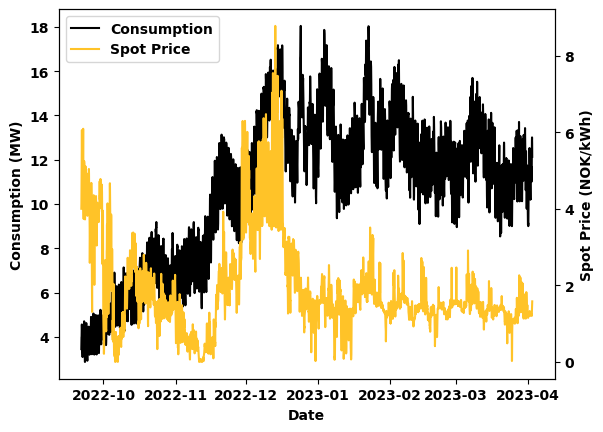

In [225]:
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
i = 0
data = DFS[i].iloc[4000:]
fig, ax = plt.subplots()
ax.plot(data["consumption"], color="black", label="Consumption")
ax.set_xlabel('Date', fontweight='bold')
ax.set_ylabel('Consumption (MW)', color='black', fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='black')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

ax2 = ax.twinx()
ax2.plot(data["spot price"], color="#FFC328", label="Spot Price")
ax2.set_ylabel('Spot Price (NOK/kWh)', color='black', fontweight='bold')
ax2.tick_params(axis='y', which='major', labelsize=10, labelcolor='black')

for direction in ['top', 'right', 'left','bottom']:
    ax.spines[direction].set_visible(True)
    ax2.spines[direction].set_visible(True)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

handles, labels = [], []
for ax in [ax, ax2]:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

# Create a single legend
legend = ax.legend(handles, labels, loc="upper left")
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.show()




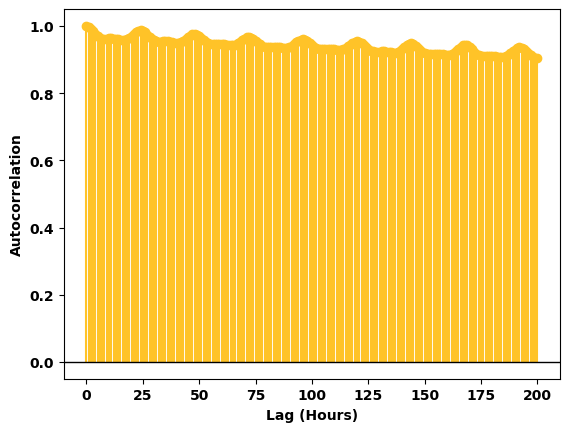

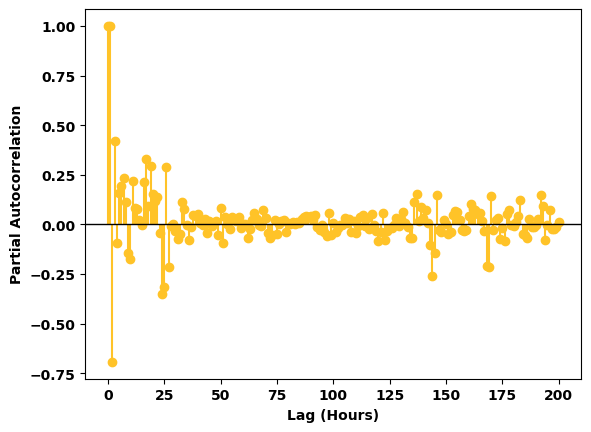

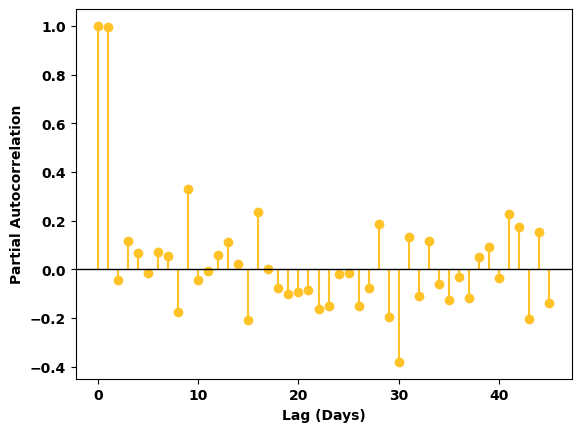

In [261]:
Colors = ['#FFC328', '#47D779', '#CFDDFF', 'black', '#CC4535', 'purple']
i = 0
alpha = 0.01

# Calculate ACF and PACF
acf_values = acf(DFS[i]["consumption"], nlags=200)
pacf_values = pacf(DFS[i]["consumption"], nlags=200)
pacf_values_day = pacf(DFS[i]["consumption"].iloc[::24], nlags=45)

# Function to set bold labels on axes
def set_bold_labels(ax):
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

# Plot ACF
fig, ax = plt.subplots()
ax.stem(np.arange(len(acf_values)), acf_values, linefmt='#FFC328', markerfmt='#FFC328', basefmt=" ")
ax.axhline(0, color='black',  lw=1)  # Horizontal line at 0
ax.set_xlabel('Lag (Hours)', fontweight='bold')  # X-axis label
ax.set_ylabel('Autocorrelation', fontweight='bold')  # Y-axis label
set_bold_labels(ax)

# Plot PACF
fig, ax = plt.subplots()
ax.stem(np.arange(len(pacf_values)), pacf_values, linefmt='#FFC328', markerfmt='#FFC328', basefmt=" ")
ax.axhline(0, color='black',  lw=1)  # Horizontal line at 0
ax.set_xlabel('Lag (Hours)', fontweight='bold')  # X-axis label
ax.set_ylabel('Partial Autocorrelation', fontweight='bold')  # Y-axis label
set_bold_labels(ax)

# Plot PACF
fig, ax = plt.subplots()
ax.stem(np.arange(len(pacf_values_day)), pacf_values_day, linefmt='#FFC328', markerfmt='#FFC328', basefmt=" ")
ax.axhline(0, color='black', lw=1)  # Horizontal line at 0
ax.set_xlabel('Lag (Days)', fontweight='bold')  # X-axis label
ax.set_ylabel('Partial Autocorrelation', fontweight='bold')  # Y-axis label
set_bold_labels(ax)

plt.show()